findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

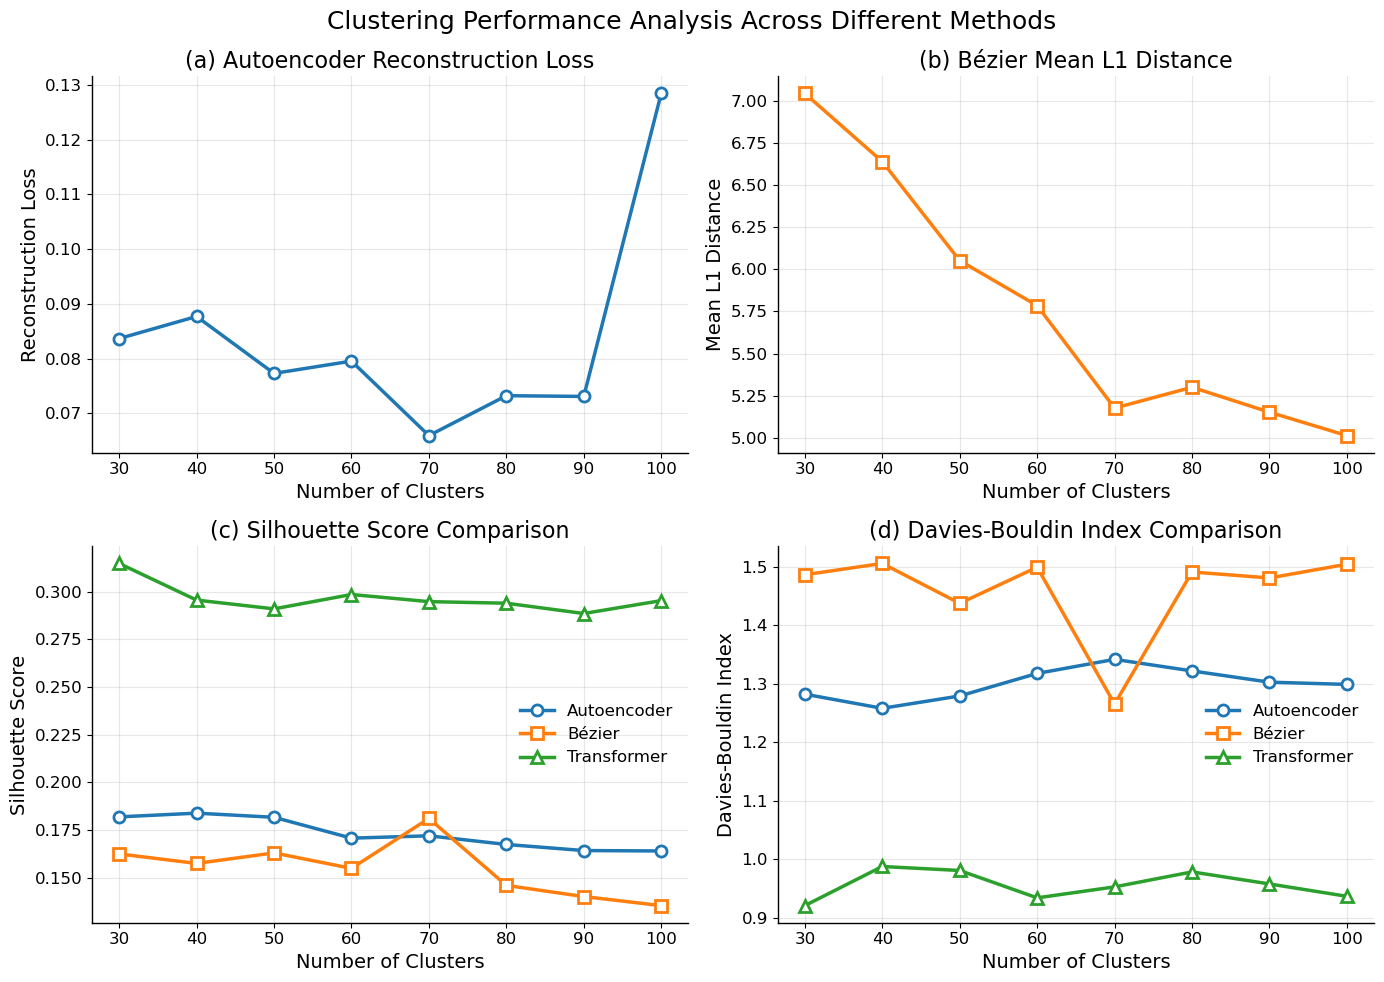

Clustering analysis subplot saved as PNG and PDF files.
Use PDF version for your thesis.


In [16]:

import pandas as pd
import matplotlib.pyplot as plt

# Professional thesis styling
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (8, 6),
    'lines.linewidth': 2.5,
    'lines.markersize': 8,
    'axes.linewidth': 1,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'grid.linewidth': 0.8,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
})

# Load and prepare data
df = pd.read_csv("results/clustering_metrics_by_kclusters_2407.csv")

new_row = pd.DataFrame([{
    "ae_recon_loss": 0.0659,
    "ae_silhouette": 0.1719,
    "ae_dbi": 1.3419,
    "bezier_silhouette": 0.1810,
    "bezier_dbi": 1.2655,
    "bezier_mean_l1": 5.1762,
    "transformer_silhouette": 0.2948,
    "transformer_dbi": 0.9525,
    "k_clusters": 70
}])

df = pd.concat([df, new_row], ignore_index=True)
df = df.sort_values("k_clusters").reset_index(drop=True)

k = df["k_clusters"]

# Colors for each method
colors = {
    'Autoencoder': '#1f77b4',
    'Bézier': '#ff7f0e', 
    'Transformer': '#2ca02c'
}

# Create 2x2 subplot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Clustering Performance Analysis Across Different Methods', fontsize=18, y=0.98)

# Plot 1: Autoencoder Reconstruction Loss
ax1.plot(k, df["ae_recon_loss"], 'o-', color=colors['Autoencoder'], 
         markerfacecolor='white', markeredgewidth=2)
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Reconstruction Loss')
ax1.set_title('(a) Autoencoder Reconstruction Loss')

# Plot 2: Bézier Mean L1 Distance
ax2.plot(k, df["bezier_mean_l1"], 's-', color=colors['Bézier'],
         markerfacecolor='white', markeredgewidth=2)
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Mean L1 Distance')
ax2.set_title('(b) Bézier Mean L1 Distance')

# Plot 3: Silhouette Score Comparison
ax3.plot(k, df["ae_silhouette"], 'o-', color=colors['Autoencoder'],
         markerfacecolor='white', markeredgewidth=2, label='Autoencoder')
ax3.plot(k, df["bezier_silhouette"], 's-', color=colors['Bézier'],
         markerfacecolor='white', markeredgewidth=2, label='Bézier')
ax3.plot(k, df["transformer_silhouette"], '^-', color=colors['Transformer'],
         markerfacecolor='white', markeredgewidth=2, label='Transformer')
ax3.set_xlabel('Number of Clusters')
ax3.set_ylabel('Silhouette Score')
ax3.set_title('(c) Silhouette Score Comparison')
ax3.legend()

# Plot 4: Davies-Bouldin Index Comparison
ax4.plot(k, df["ae_dbi"], 'o-', color=colors['Autoencoder'],
         markerfacecolor='white', markeredgewidth=2, label='Autoencoder')
ax4.plot(k, df["bezier_dbi"], 's-', color=colors['Bézier'],
         markerfacecolor='white', markeredgewidth=2, label='Bézier')
ax4.plot(k, df["transformer_dbi"], '^-', color=colors['Transformer'],
         markerfacecolor='white', markeredgewidth=2, label='Transformer')
ax4.set_xlabel('Number of Clusters')
ax4.set_ylabel('Davies-Bouldin Index')
ax4.set_title('(d) Davies-Bouldin Index Comparison')
ax4.legend()

plt.tight_layout()
plt.savefig('clustering_analysis.png', dpi=300)
plt.savefig('clustering_analysis.pdf')
plt.show()

print("Clustering analysis subplot saved as PNG and PDF files.")
print("Use PDF version for your thesis.")


findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

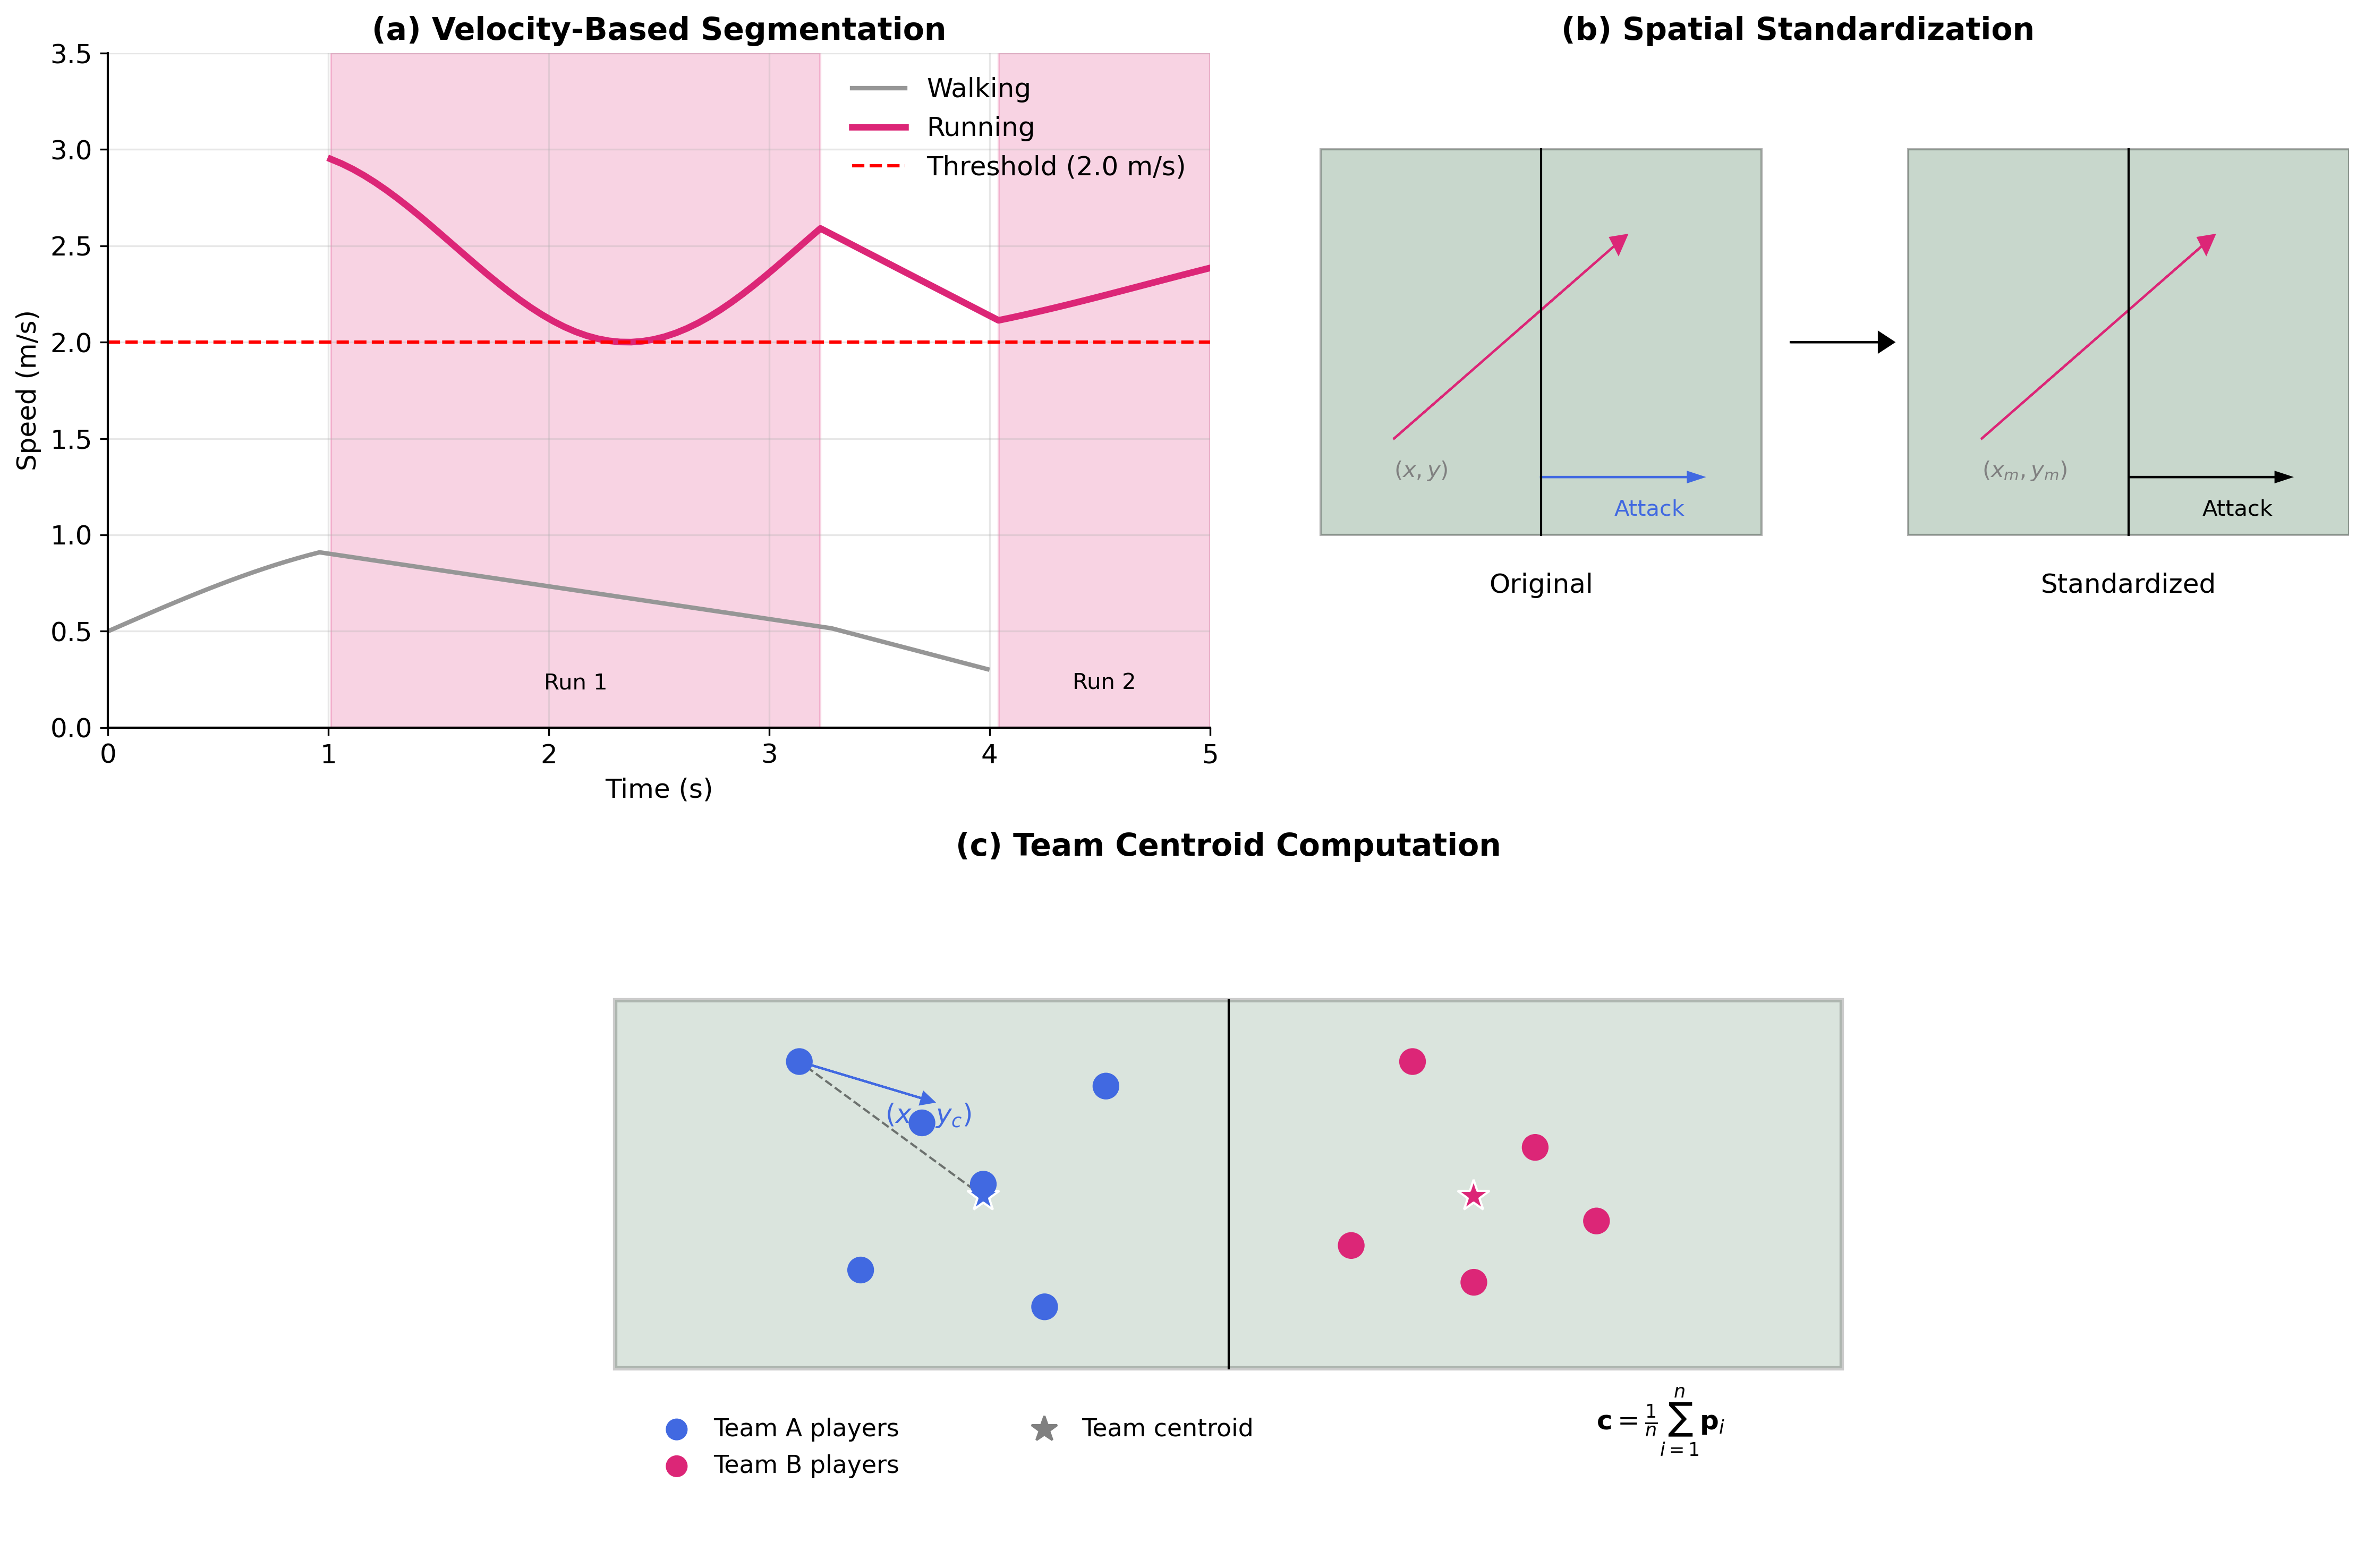

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Circle, Rectangle, FancyArrowPatch
import numpy as np

# Create figure with three subplots
fig = plt.figure(figsize=(15, 10), dpi=300)

# Define colors
pitch_color = '#4a7c59'
run_color = '#dc2677'
walk_color = '#969696'
team_a_color = '#4169E1'
team_b_color = '#dc2677'

# Panel 1: Velocity Segmentation
ax1 = plt.subplot(2, 2, 1)
ax1.set_title('(a) Velocity-Based Segmentation', fontsize=14, weight='bold')

# Generate speed profile
time = np.linspace(0, 5, 100)
speed = np.zeros_like(time)
# Create speed profile with runs and walks
speed[0:20] = 0.5 + 0.5 * np.sin(time[0:20])
speed[20:65] = 2.5 + 0.5 * np.sin(2 * time[20:65])
speed[65:80] = 1.5 - 0.3 * time[65:80]
speed[80:100] = 2.3 + 0.3 * np.cos(time[80:100])

# Plot speed profile
walk_mask = speed < 2.0
run_mask = speed >= 2.0

ax1.plot(time[walk_mask], speed[walk_mask], color=walk_color, linewidth=2, label='Walking')
ax1.plot(time[run_mask], speed[run_mask], color=run_color, linewidth=3, label='Running')

# Add threshold line
ax1.axhline(y=2.0, color='red', linestyle='--', linewidth=1.5, label='Threshold (2.0 m/s)')

# Shade run segments
run_starts = np.where(np.diff(np.concatenate(([False], run_mask, [False]))))[0]
for i in range(0, len(run_starts), 2):
    ax1.axvspan(time[run_starts[i]], time[run_starts[i+1]-1], alpha=0.2, color=run_color)
    ax1.text((time[run_starts[i]] + time[run_starts[i+1]-1])/2, 0.2, f'Run {i//2 + 1}', 
             ha='center', fontsize=10)

ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Speed (m/s)', fontsize=12)
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 3.5)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right')

# Panel 2: Spatial Standardization
ax2 = plt.subplot(2, 2, 2)
ax2.set_title('(b) Spatial Standardization', fontsize=14, weight='bold')
ax2.set_xlim(-0.5, 7)
ax2.set_ylim(-0.5, 3)
ax2.axis('off')

# Original pitch
original_pitch = Rectangle((0, 0.5), 3, 2, facecolor=pitch_color, alpha=0.3, edgecolor='black')
ax2.add_patch(original_pitch)
ax2.plot([1.5, 1.5], [0.5, 2.5], 'k-', linewidth=1)

# Original trajectory
ax2.arrow(0.5, 1, 1.5, 1, head_width=0.1, head_length=0.1, fc=run_color, ec=run_color)
ax2.text(0.5, 0.8, '$(x,y)$', fontsize=10, color='gray')

# Attack direction
ax2.arrow(1.5, 0.8, 1, 0, head_width=0.05, head_length=0.1, fc=team_a_color, ec=team_a_color)
ax2.text(2, 0.6, 'Attack', fontsize=10, color=team_a_color)

# Arrow between pitches
ax2.arrow(3.2, 1.5, 0.6, 0, head_width=0.1, head_length=0.1, fc='black', ec='black')

# Standardized pitch
standard_pitch = Rectangle((4, 0.5), 3, 2, facecolor=pitch_color, alpha=0.3, edgecolor='black')
ax2.add_patch(standard_pitch)
ax2.plot([5.5, 5.5], [0.5, 2.5], 'k-', linewidth=1)

# Standardized trajectory
ax2.arrow(4.5, 1, 1.5, 1, head_width=0.1, head_length=0.1, fc=run_color, ec=run_color)
ax2.text(4.5, 0.8, '$(x_m,y_m)$', fontsize=10, color='gray')

# Standard attack direction
ax2.arrow(5.5, 0.8, 1, 0, head_width=0.05, head_length=0.1, fc='black', ec='black')
ax2.text(6, 0.6, 'Attack', fontsize=10)

ax2.text(1.5, 0.2, 'Original', fontsize=12, ha='center')
ax2.text(5.5, 0.2, 'Standardized', fontsize=12, ha='center')

# Panel 3: Team Centroid Computation
ax3 = plt.subplot(2, 1, 2)
ax3.set_title('(c) Team Centroid Computation', fontsize=14, weight='bold', pad=10)
ax3.set_xlim(-0.5, 10.5)
ax3.set_ylim(-1.5, 4)
ax3.set_aspect('equal')
ax3.axis('off')

# Pitch
pitch = Rectangle((0, 0), 10, 3, facecolor=pitch_color, alpha=0.2, edgecolor='black', linewidth=2)
ax3.add_patch(pitch)
ax3.plot([5, 5], [0, 3], 'k-', linewidth=1)

# Team A players
team_a_positions = [(2, 0.8), (2.5, 2), (3, 1.5), (3.5, 0.5), (4, 2.3)]
for pos in team_a_positions:
    ax3.add_patch(Circle(pos, 0.1, color=team_a_color, zorder=5))

# Team B players
team_b_positions = [(6, 1), (6.5, 2.5), (7, 0.7), (7.5, 1.8), (8, 1.2)]
for pos in team_b_positions:
    ax3.add_patch(Circle(pos, 0.1, color=team_b_color, zorder=5))

# Centroids
centroid_a = (3, 1.4)
centroid_b = (7, 1.4)
ax3.plot(*centroid_a, marker='*', markersize=15, color=team_a_color, markeredgecolor='white', markeredgewidth=1)
ax3.plot(*centroid_b, marker='*', markersize=15, color=team_b_color, markeredgecolor='white', markeredgewidth=1)

# Running player
runner_pos = (1.5, 2.5)
ax3.add_patch(Circle(runner_pos, 0.1, color=team_a_color, zorder=5))
ax3.arrow(1.5, 2.5, 1, -0.3, head_width=0.1, head_length=0.1, fc=team_a_color, ec=team_a_color)

# Centroid-relative position
ax3.plot([centroid_a[0], runner_pos[0]], [centroid_a[1], runner_pos[1]], 
         'k--', alpha=0.5, linewidth=1)
ax3.text(2.2, 2.0, r'$(x_c,y_c)$', fontsize=12, color=team_a_color)

# Legend
ax3.add_patch(Circle((0.5, -0.5), 0.08, color=team_a_color))
ax3.text(0.8, -0.5, 'Team A players', fontsize=11, va='center')
ax3.add_patch(Circle((0.5, -0.8), 0.08, color=team_b_color))
ax3.text(0.8, -0.8, 'Team B players', fontsize=11, va='center')
ax3.plot(3.5, -0.5, marker='*', markersize=12, color='gray')
ax3.text(3.8, -0.5, 'Team centroid', fontsize=11, va='center')

# Formula
ax3.text(8, -0.5, r'$\mathbf{c} = \frac{1}{n}\sum_{i=1}^{n}\mathbf{p}_i$', fontsize=12)

plt.tight_layout()
plt.savefig('segmentation_process.pdf', dpi=300, bbox_inches='tight')
plt.savefig('segmentation_process.png', dpi=300, bbox_inches='tight')
plt.show()

Loading and preprocessing clustering metrics data...
✓ Data loaded successfully: 8 observations
Generating publication-quality figures...
Saving figures in publication formats...
✓ Figure saved: clustering_performance_analysis.pdf
✓ Figure saved: clustering_performance_analysis.png


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


✓ Figure saved: clustering_performance_analysis.eps

STATISTICAL SUMMARY

Optimal k values (Silhouette Score):
  Ae: k=40 (score=0.1838)
  Bezier: k=70 (score=0.1810)
  Transformer: k=30 (score=0.3148)

Optimal k values (Davies-Bouldin Index):
  Ae: k=40 (score=1.2582)
  Bezier: k=70 (score=1.2655)
  Transformer: k=30 (score=0.9204)


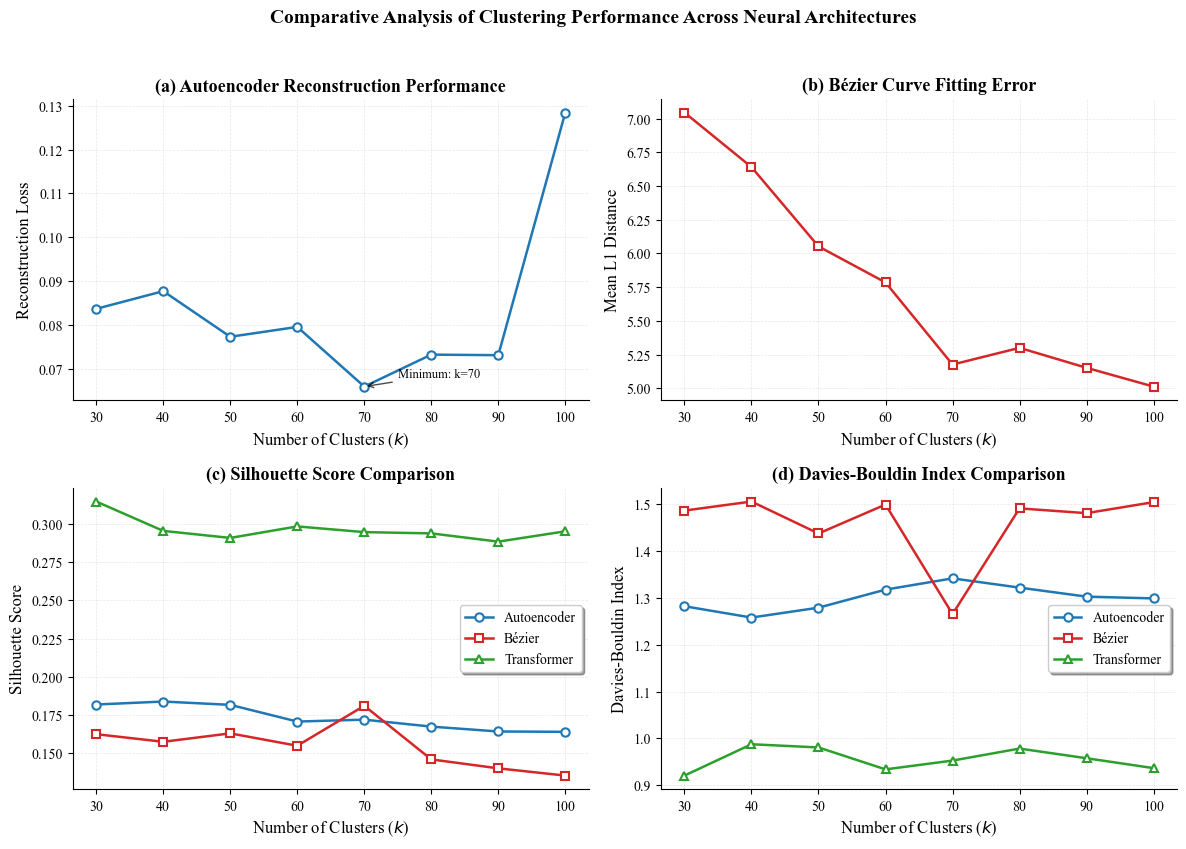


✓ Analysis complete. Figures saved in PDF, PNG, and EPS formats.
  → Use PDF/EPS for LaTeX documents
  → Use PNG for presentations and web


In [18]:



#!/usr/bin/env python3
"""
Clustering Performance Analysis for Academic Publication

This module provides comprehensive visualization and analysis of clustering
performance metrics across multiple neural network architectures including
autoencoders, Bézier curve fitting, and transformer models.

Author: [Your Name]
Institution: [Your Institution]
Date: July 2025
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from typing import Dict, Tuple, Optional
import warnings
warnings.filterwarnings('ignore')

# Publication-quality matplotlib configuration
PUBLICATION_CONFIG = {
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'DejaVu Serif', 'serif'],
    'font.size': 11,
    'axes.labelsize': 12,
    'axes.titlesize': 13,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.figsize': (12, 9),
    'lines.linewidth': 1.8,
    'lines.markersize': 6,
    'axes.linewidth': 0.8,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.grid': True,
    'grid.alpha': 0.25,
    'grid.linewidth': 0.5,
    'grid.linestyle': '--',
    'savefig.dpi': 600,
    'savefig.bbox': 'tight',
    'savefig.format': 'pdf',
    'text.usetex': False,  # Set to True if LaTeX is available
}

# IEEE/Academic color palette
METHOD_COLORS = {
    'Autoencoder': '#1f77b4',      # Professional blue
    'Bézier': '#d62728',           # Academic red  
    'Transformer': '#2ca02c'       # Research green
}

# Marker styles for clear differentiation
METHOD_MARKERS = {
    'Autoencoder': 'o',
    'Bézier': 's', 
    'Transformer': '^'
}

class ClusteringAnalyzer:
    """
    A comprehensive analyzer for clustering performance metrics across
    different neural network architectures.
    """
    
    def __init__(self, data_path: str):
        """
        Initialize the analyzer with data from the specified path.
        
        Args:
            data_path (str): Path to the clustering metrics CSV file
        """
        self.data_path = data_path
        self.df = None
        self._configure_matplotlib()
        
    def _configure_matplotlib(self) -> None:
        """Configure matplotlib with publication-quality settings."""
        plt.rcParams.update(PUBLICATION_CONFIG)
        
    def load_and_preprocess_data(self) -> pd.DataFrame:
        """
        Load clustering metrics data and perform necessary preprocessing.
        
        Returns:
            pd.DataFrame: Preprocessed clustering metrics
        """
        try:
            self.df = pd.read_csv(self.data_path)
        except FileNotFoundError:
            raise FileNotFoundError(f"Data file not found at {self.data_path}")
            
        # Add supplementary data point for k=70
        supplementary_data = {
            "ae_recon_loss": 0.0659,
            "ae_silhouette": 0.1719,
            "ae_dbi": 1.3419,
            "bezier_silhouette": 0.1810,
            "bezier_dbi": 1.2655,
            "bezier_mean_l1": 5.1762,
            "transformer_silhouette": 0.2948,
            "transformer_dbi": 0.9525,
            "k_clusters": 70
        }
        
        supplementary_row = pd.DataFrame([supplementary_data])
        self.df = pd.concat([self.df, supplementary_row], ignore_index=True)
        self.df = self.df.sort_values("k_clusters").reset_index(drop=True)
        
        return self.df
        
    def create_publication_figure(self) -> Tuple[plt.Figure, np.ndarray]:
        """
        Create a publication-ready figure with four subplots analyzing
        different clustering performance metrics.
        
        Returns:
            Tuple[plt.Figure, np.ndarray]: Figure and axes objects
        """
        if self.df is None:
            raise ValueError("Data must be loaded before creating figures")
            
        k_values = self.df["k_clusters"]
        
        # Create figure with optimized subplot arrangement
        fig, axes = plt.subplots(2, 2, figsize=(12, 9))
        fig.suptitle('Comparative Analysis of Clustering Performance Across Neural Architectures', 
                    fontsize=14, y=0.96, weight='bold')
        
        # Subplot (a): Autoencoder Reconstruction Loss
        self._plot_reconstruction_loss(axes[0, 0], k_values)
        
        # Subplot (b): Bézier Curve Fitting Error
        self._plot_bezier_error(axes[0, 1], k_values)
        
        # Subplot (c): Silhouette Score Analysis
        self._plot_silhouette_comparison(axes[1, 0], k_values)
        
        # Subplot (d): Davies-Bouldin Index Analysis
        self._plot_dbi_comparison(axes[1, 1], k_values)
        
        # Optimize layout and spacing
        plt.tight_layout(rect=[0, 0.02, 1, 0.94])
        
        return fig, axes
        
    def _plot_reconstruction_loss(self, ax: plt.Axes, k_values: pd.Series) -> None:
        """Plot autoencoder reconstruction loss analysis."""
        ax.plot(k_values, self.df["ae_recon_loss"], 
               marker=METHOD_MARKERS['Autoencoder'],
               color=METHOD_COLORS['Autoencoder'],
               markerfacecolor='white',
               markeredgewidth=1.5,
               linewidth=1.8,
               markersize=6)
               
        ax.set_xlabel('Number of Clusters ($k$)')
        ax.set_ylabel('Reconstruction Loss')
        ax.set_title('(a) Autoencoder Reconstruction Performance', weight='bold')
        ax.grid(True, alpha=0.3)
        
        # Add optimal point annotation
        min_idx = self.df["ae_recon_loss"].idxmin()
        optimal_k = self.df.loc[min_idx, "k_clusters"]
        optimal_loss = self.df.loc[min_idx, "ae_recon_loss"]
        ax.annotate(f'Minimum: k={int(optimal_k)}', 
                   xy=(optimal_k, optimal_loss),
                   xytext=(optimal_k + 5, optimal_loss + 0.002),
                   arrowprops=dict(arrowstyle='->', color='black', alpha=0.7),
                   fontsize=9)
        
    def _plot_bezier_error(self, ax: plt.Axes, k_values: pd.Series) -> None:
        """Plot Bézier curve fitting error analysis."""
        ax.plot(k_values, self.df["bezier_mean_l1"],
               marker=METHOD_MARKERS['Bézier'],
               color=METHOD_COLORS['Bézier'],
               markerfacecolor='white',
               markeredgewidth=1.5,
               linewidth=1.8,
               markersize=6)
               
        ax.set_xlabel('Number of Clusters ($k$)')
        ax.set_ylabel('Mean L1 Distance')
        ax.set_title('(b) Bézier Curve Fitting Error', weight='bold')
        ax.grid(True, alpha=0.3)
        
    def _plot_silhouette_comparison(self, ax: plt.Axes, k_values: pd.Series) -> None:
        """Plot comparative silhouette score analysis."""
        methods = [
            ('ae_silhouette', 'Autoencoder'),
            ('bezier_silhouette', 'Bézier'),
            ('transformer_silhouette', 'Transformer')
        ]
        
        for metric, method in methods:
            ax.plot(k_values, self.df[metric],
                   marker=METHOD_MARKERS[method],
                   color=METHOD_COLORS[method],
                   markerfacecolor='white',
                   markeredgewidth=1.5,
                   linewidth=1.8,
                   markersize=6,
                   label=method)
                   
        ax.set_xlabel('Number of Clusters ($k$)')
        ax.set_ylabel('Silhouette Score')
        ax.set_title('(c) Silhouette Score Comparison', weight='bold')
        ax.legend(frameon=True, fancybox=True, shadow=True)
        ax.grid(True, alpha=0.3)
        
    def _plot_dbi_comparison(self, ax: plt.Axes, k_values: pd.Series) -> None:
        """Plot comparative Davies-Bouldin Index analysis."""
        methods = [
            ('ae_dbi', 'Autoencoder'),
            ('bezier_dbi', 'Bézier'),
            ('transformer_dbi', 'Transformer')
        ]
        
        for metric, method in methods:
            ax.plot(k_values, self.df[metric],
                   marker=METHOD_MARKERS[method],
                   color=METHOD_COLORS[method],
                   markerfacecolor='white',
                   markeredgewidth=1.5,
                   linewidth=1.8,
                   markersize=6,
                   label=method)
                   
        ax.set_xlabel('Number of Clusters ($k$)')
        ax.set_ylabel('Davies-Bouldin Index')
        ax.set_title('(d) Davies-Bouldin Index Comparison', weight='bold')
        ax.legend(frameon=True, fancybox=True, shadow=True)
        ax.grid(True, alpha=0.3)
        
    def save_publication_figures(self, base_filename: str = 'clustering_performance_analysis') -> None:
        """
        Save figures in multiple formats suitable for academic publication.
        
        Args:
            base_filename (str): Base filename for saved figures
        """
        formats = ['pdf', 'png', 'eps']
        
        for fmt in formats:
            filename = f"{base_filename}.{fmt}"
            plt.savefig(filename, 
                       format=fmt, 
                       dpi=600 if fmt == 'png' else None,
                       bbox_inches='tight',
                       pad_inches=0.1)
            print(f"✓ Figure saved: {filename}")
            
    def generate_statistical_summary(self) -> Dict:
        """
        Generate statistical summary of clustering performance metrics.
        
        Returns:
            Dict: Statistical summary including optimal k values and performance ranges
        """
        summary = {
            'optimal_k_silhouette': {},
            'optimal_k_dbi': {},
            'performance_ranges': {}
        }
        
        # Find optimal k for each method based on silhouette score (maximize)
        for method in ['ae', 'bezier', 'transformer']:
            sil_col = f"{method}_silhouette"
            if sil_col in self.df.columns:
                max_idx = self.df[sil_col].idxmax()
                summary['optimal_k_silhouette'][method] = {
                    'k': int(self.df.loc[max_idx, 'k_clusters']),
                    'score': self.df.loc[max_idx, sil_col]
                }
                
        # Find optimal k for each method based on DBI (minimize)
        for method in ['ae', 'bezier', 'transformer']:
            dbi_col = f"{method}_dbi"
            if dbi_col in self.df.columns:
                min_idx = self.df[dbi_col].idxmin()
                summary['optimal_k_dbi'][method] = {
                    'k': int(self.df.loc[min_idx, 'k_clusters']),
                    'score': self.df.loc[min_idx, dbi_col]
                }
                
        return summary


def main():
    """
    Main execution function for clustering performance analysis.
    """
    # Initialize analyzer
    analyzer = ClusteringAnalyzer("results/clustering_metrics_by_kclusters_2407.csv")
    
    # Load and preprocess data
    print("Loading and preprocessing clustering metrics data...")
    data = analyzer.load_and_preprocess_data()
    print(f"✓ Data loaded successfully: {len(data)} observations")
    
    # Create publication figure
    print("Generating publication-quality figures...")
    fig, axes = analyzer.create_publication_figure()
    
    # Save figures in multiple formats
    print("Saving figures in publication formats...")
    analyzer.save_publication_figures()
    
    # Generate statistical summary
    summary = analyzer.generate_statistical_summary()
    print("\n" + "="*50)
    print("STATISTICAL SUMMARY")
    print("="*50)
    
    print("\nOptimal k values (Silhouette Score):")
    for method, data in summary['optimal_k_silhouette'].items():
        print(f"  {method.capitalize()}: k={data['k']} (score={data['score']:.4f})")
        
    print("\nOptimal k values (Davies-Bouldin Index):")
    for method, data in summary['optimal_k_dbi'].items():
        print(f"  {method.capitalize()}: k={data['k']} (score={data['score']:.4f})")
    
    # Display figure
    plt.show()
    
    print(f"\n✓ Analysis complete. Figures saved in PDF, PNG, and EPS formats.")
    print("  → Use PDF/EPS for LaTeX documents")
    print("  → Use PNG for presentations and web")


if __name__ == "__main__":
    main()
